# Sat-Xception


To better detect schools on a large geospatial scale, we create a deep learning python package called `Sat-Xception`. 


Sat-Xception is a deep learning python package that utilizes pre-trained models from ImageNet. The model is designed to help our partners to quickly transfer-learn and fine-tune image classification deep learning quickly with their customized images. 

Besides a pre-train Xception neural net, we include another light-weighted pre-trained model, called MobileNet version 2, in this python package. 

MobileNetV2 is a model that is slightly less accurate compared to Xception. However, it's a very light-weight, fast, and it's easy to tune for resources vs. accuracy. 

We have two pre-trained models in `Sat-Xception`: 
- 1) [Xception](https://arxiv.org/abs/1610.02357); 
- 2) [MobileNetV2](https://ai.googleblog.com/2018/04/mobilenetv2-next-generation-of-on.html). 

![Deep Neural Net performance and the weight](DCNNs.jpeg)

Xception model and MobileNetV2 were released by Google in 2016 and 2018 respectively. Both models have fewer parameters (lighter weighted) compare to other existing pre-trained models (see above image) but they have achieved high accuracy with training on ImageNet. 

And MobileNetV2 can potentially train, transfer-learn and fine-tune client's images on mobile phones.

# The first iteration

## 1. Sat_Xception installation

#### *Currently the package has only been tested on python version 3.6.3.*  


To install `sat-xception` , transfer-learn and fine tune an image classification model, you need to:

- set up an python environment using [conda to create a virtual environment](https://uoa-eresearch.github.io/eresearch-cookbook/recipe/2014/11/20/conda/) or use [pyenv](https://gist.github.com/Geoyi/f55ed54d24cc9ff1c14bd95fac21c042);

- git clone this repo;
- cd to main_model where the `sat-xception` is located;
- run `pip3 install -e .` or `pip install -e .`

In [2]:
# under the main_model directory, install the sat-xception by
!pip install -e .

Obtaining file:///example
    100% |################################| 3.0MB 16.6MB/s ta 0:00:01
    100% |################################| 532kB 39.3MB/s ta 0:00:01
    100% |################################| 419kB 40.7MB/s ta 0:00:01
    100% |################################| 4.8MB 10.9MB/s ta 0:00:01
    100% |################################| 5.6MB 10.2MB/s ta 0:00:01
    100% |################################| 15.0MB 4.3MB/s eta 0:00:01
    100% |################################| 24.5MB 2.7MB/s eta 0:00:01    52% |################                | 12.7MB 64.2MB/s eta 0:00:01
    100% |################################| 645kB 35.9MB/s ta 0:00:01
    100% |################################| 61kB 31.3MB/s ta 0:00:01
    100% |################################| 256kB 40.9MB/s ta 0:00:01
    100% |################################| 34.0MB 2.0MB/s eta 0:00:01
    100% |################################| 48.2MB 1.4MB/s eta 0:00:01
    100% |################################| 184kB 40.8MB/s ta

## 2. Training dataset

Development Seed Data Team, a group of five expert mappers, worked on cleaning and validating school geolocations. With [clear school campus patterns in Colombia](https://paper.dropbox.com/doc/School-patterns-Colombia--ASxTzKwG7qjp7nmuI5fMTPWmAg-MaCi6NdLpkxoR8Lk4Qfrn), our expert mappers were able to confirm 10,951 schools from 44,655 given schools in Colombia from the UNICEF team.

We generated **5452** tiles for a confirmed school class and **8,647** not-schools classes at zoom 17 (about 300m x 300m per tile), and **5,904** school tiles together with **9,092** not-school tile (151m x 151m per tile) to be used to fine-tune the xception model with Sat_Xception. A more detailed tiles breakdown is available at the following table.


|Tasks|Confirmed | Unreconginized | not-schools| Total | Additional |
| ----| -------- | -------------- | ---------- | ----- | ---------- |
| Data Cleaning  |  6,663   | 11,774         | 2,268      | 20,705| 1st round |  
| Data Cleaning  | 10,951   | 26,638         | 7,066      | 44,655| 2nd round w/ all data|
| 1st round tile generation  | 5,452     | N/A     | 3,953 | 9,405| zoom 17 | 
| 2nd round tile generation  | 5,452     | N/A     |  8,647 | 14, 099 | zoom 17 |
| 2nd round tile generation  | 5,904 | N/A     | 9,092 | 14,996 | zoom 18 |

The training dataset has been split into train and test **(80:20)**. Under each folder, we have two categories of image tiles that we care about, which are school and not-school. 


We organize the training dataset in such a order:

```

└── main_model/
    ├── train/
           ├── not-school (3163 tiles)
           ├── school (4362 tiles)
    └── test/
           ├── not-school (790 tiles + 300 tiles) 
           ├── school (1090 tiles)
```

## 3. Start transfer-learning, fine-tune with Sat-Xception

In [ ]:
!sat_xception train -model=xception -train=train -valid=test

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
Start time: 19/12 21:56:38

Datasets used:
'/example'

Training details:
{   'class_weight': {0: 2, 1: 1},
    'early_stopping_min_delta': 0.01,
    'early_stopping_patience': 5,
    'img_size': (256, 256, 3),
    'max_queue_size': 128,
    'n_epo_phase1': [1, 2],
    'n_epo_phase2': 15,
    'n_rand_hp_iters': 5,
    'n_total_hp_iters': 100,
    'reduce_lr_min_delta': 0.1,
    'reduce_lr_patience': 3,
    'steps_per_test_epo': None,
    'steps_per_train_epo': 256,
    'use_multiprocessing': False,
    'workers': 8}

Model details:
{   'dense_activation': ['relu', 'elu'],
    'dense_size': [128, 256, 512],
    'dropout_rate': [0, 0.1, 0.25, 0.5],

## 4. An option to train and fine-tune the model with NVIDIA docker and GPU

### A. (optional) Run Sat_Xception notebook under NVIDIA docker on a cloud machine

To run a pre-built nvidia-docker image from us, you need to go through these few steps:

- start an AWS Deep learning AMI EC2 machine with jupyter security group setup;

- ssh to the GPU cloud machine;

- install [docker](https://docs.aws.amazon.com/AmazonECS/latest/developerguide/docker-basics.html) and [nvidia-docker](https://towardsdatascience.com/using-docker-to-set-up-a-deep-learning-environment-on-aws-6af37a78c551) on AWS EC2 GPU machine. I test this script on a g2.x8large machine. 

- copy the main_model to your GPU cloud computer;

- Run `nvidia-docker run -v $PWD:/example -p 8888:8888 -it geoyi/sat_xception` under the directory `main_model`, this command will pull a pre-built docker image from dockerhub; and run a jupyter notebook server on port 8888. 

- At another terminal tab, run `ssh -i YOUR_AWS_KEY.pem -L 8888:localhost:8888 ubuntu@xxxxxxx` to allow you to access the jupyter notebook from outside; 

- When you run the notebook the first time, copy and pasted something like http://127.0.0.1::8888/?token=xxxxxx to your browser to open the notebook.


### B. (optional) Run Sat_Xception under NVIDIA docker on a cloud machine

- start an AWS Deep learning AMI EC2 machine with jupyter security group setup;

- ssh to the GPU cloud machine;

- install [docker](https://docs.aws.amazon.com/AmazonECS/latest/developerguide/docker-basics.html) and [nvidia-docker](https://towardsdatascience.com/using-docker-to-set-up-a-deep-learning-environment-on-aws-6af37a78c551) on AWS EC2 GPU machine. I test this script on a g2.x8large machine. 

- copy the main_model to your GPU cloud computer;

- Run `nvidia-docker run -v $PWD:/example -it geoyi/sat_xception bash` to start the docker container and run CLI;

- `cd example`

- run `pip install -e .` to install sat_xception package;

- run `sat_xception train -model=xception -train=train -valid=test` to train school detection with a pre-trained xception model. 

## 5. Training results

Sat-Xception is saving all the model checkpoint and the graph to Tensorboard, so you can monitor how the training performs along the training process. 

**We trained above model on an AWS GPU machine, `g2.x8large` specifically, for 40 hours, the model wasn't run on this notebook but at the backend on an AWS cloud machine.** Here are some results from Tensorboard. 

You can inspect the training tensorboard by running `tensorboard --logdir=tensorboard/`

![Training_accuracy](training_accuracy.png)

![Validation_accuracy](validation_accuracy.png)

![learning rate and loss](loss_lr.png)

## 6. Roadmap for next iteration (for the first iteration)

All computation and data manipulation was carried out on Amazon Web Services (AWS). We used AWS Elastic Compute Cloud (EC2) Deep Learning AMI for the model training. 

Through the 40+ hours of training and tuning, we observed the model accuracy is going up with the model loss goes down (see above images). It indicates the model is keeping learning new image features from the given tiles with image augmentation. Image augmentation was generated by the high-level deep learning python package Keras, which zoom in and out, vertically and horizontally flip, brighten, and shift the color channel of the given tiles. Therefore, it allows the model to see diverse features of the tiles that can reflect in real satellite imagery tiles. **In next iteration, we can include diverse classes in not-school classes to balance out the binary classes**.


In the first iteration of the model, we used **categorical_crossentropy** and class weight to encourage the model to learn. **At the second iteration, we can try out a few other loss functions especially binary_crossentropy, which is designed to monitor binary classification**.


Deep learning can be a bit tedious that we are using millions of parameter to tune. A good strategy is to test a wide range of hyperparameters and select the model with high performance. Our current best performance (see above Tensorboard result) is the last trained model that recorded on Dec 18 13:14:08. 

We can do A-B test between two built-in models, Xception and MobileNetV2, to see the model performance as well as model inference.

For the first iteration of school detection, we adapted the hyperparameters from another project we've done for high-voltage tower detection. **All the default hyperparameters for training is written in `train_config.py` under Sat_Xception, which can be further tuned particularly for school detection purpose. We provide the following script to help the UNICEF team to tune and over-write current configure hyperparameters**. 

 **For the second iteration we can give the model a long time to train and tune on the given binary class tiles with following hyperparameters optimizing and improvement**

**Note** Any hyperparameters you set at following script, when you excute the cell, it will overwrite current default according hyperparameters in `Sat-Xception` model.

In [ ]:
%%file sat_xception/config.py


"""
config.py

List some configuration parameters for training model
"""

import os
from os import path as op


# Set directories for saving model weights and tensorboard information
data_dir = os.getcwd()

#     cloud_comp = False

ckpt_dir = op.join(os.getcwd(), "models")
tboard_dir = op.join(os.getcwd(), "tensorboard")
preds_dir = op.join(os.getcwd(), "preds")
plot_dir = op.join(os.getcwd(), "plots")
cloud_comp = False

if not op.isdir(ckpt_dir):
    os.mkdir(ckpt_dir)
if not op.isdir(tboard_dir):
    os.mkdir(tboard_dir)

model_params = dict(loss=['categorical_crossentropy'],
                    optimizer=[dict(opt_func='adam'),
                               dict(opt_func='rmsprop')],
                               # SGD as below performed notably poorer in 1st big hyperopt run
                               #dict(opt_func='sgd', momentum=hp.uniform('momentum', 0.5, 0.9))],
                    lr_phase1=[1e-4, 1e-3],  # learning rate for phase 1 (output layer only)
                    lr_phase2=[1e-5, 1e-4],  # learning rate for phase 2 (all layers beyond freeze_cutoff)
                    weight_init=['glorot_uniform'],
                    metrics=['categorical_accuracy'],
                    # Blocks organized in 10s, 66, 76, 86, etc.
                    freeze_cutoff=[0],  # Layer below which no training/updating occurs on weights
                    dense_size=[128, 256, 512],  # Number of nodes in 2nd to final layer
                    n_classes=2,  # Number of class choices in final layer
                    output_activation=['softmax'],
                    dense_activation=['relu', 'elu'],
                    dropout_rate=[0, 0.1, 0.25, 0.5])  # Dropout in final layer

train_params = dict(n_rand_hp_iters=5,
                    n_total_hp_iters=100,  # Total number of HyperParam experiments to run
                    n_epo_phase1=[1, 2],  # Number of epochs training only top layer
                    n_epo_phase2=15,  # Number of epochs fine tuning whole model
                    max_queue_size=128,
                    workers=8,
                    use_multiprocessing=False,
                    #prop_total_img_set=0.5,  # Proportion of total images per train epoch
                    img_size=(256, 256, 3),
                    early_stopping_patience=5,  # Number of iters w/out val_acc increase
                    early_stopping_min_delta=0.01,
                    reduce_lr_patience=3,  # Number of iters w/out val_acc increase
                    reduce_lr_min_delta=0.1,
                    class_weight={0: 2, 1: 1},  # Based on pakistan_redux image counts
                    steps_per_train_epo=256,
                    steps_per_test_epo=None)

# Define params for ImageDataGenerator and ImageDataGenerator.flow_from_directory
data_flow = dict(image_data_generator=dict(horizontal_flip=True,
                                           vertical_flip=True,
                                           rotation_range=180,
                                           zoom_range=(1, 1.2),
                                           brightness_range=(0.8, 1.2),
                                           channel_shift_range=10),
                 flow_from_dir=dict(target_size=train_params['img_size'][:2],  # Only want width/height here
                                    color_mode='rgb',
                                    classes=['not_school', 'school'],  # Keep this ordering, it should match class_weights
                                    batch_size=32,  # Want as large as GPU can handle, using batch-norm layers
                                    seed=42,  # Seed for random number generator
                                    save_to_dir=None))  # Set to visualize augmentations


## Summary for the first iteration

For coming work we will focus on:

    - cleaning training dataset especially get rid of the school tiles that have not-school info, and add more not-school tiles;
    - update loss function and evaluation matrix accordingly; 
    - A-B test between Xception and MobileNetV2, visualizing and evaluating the model performance;
    - packaging the best-performed model with Tensorflow serving as docker images;
    - Write an explicit instruction on model inference with created docker images for school detections; 
    - Development Seed Data Team validate model prediction; 
    - Documentation and share updated scripts and documentation.

# The second iteration updates

The training datasets, in zoom 17 and zoom 18, both went to train Xception and MobileNetV2. Your concern around zoom 17 was proved to be correct. From monitoring the model training, we observed the model trained with Xception on zoom 18 performed better than others.

### Xception with Zoom18 

![tensorboard-z18-accuracy.png](tensorboard-z18-accuracy.png)

![tensorboard-val-accuracy-z18.png](tensorboard-val-accuracy-z18.png)

![tensorboard-loss-zoom18.png](tensorboard-loss-zoom18.png)

**The curent accuracy approached 0.9 with Val accuracy to 0.88.**

**The best-performed model now has been turned into [tensorflow-serving docker image](https://cloud.docker.com/u/geoyi/repository/docker/geoyi/unicef_school_tf_serving), which will allow us to make model inference over a large area like Colombia, 50.8 million zoom 18 tiles, more efficient. Currently, we estimate it will take a day to run the model through Colombia with our current ML inference pipeline**

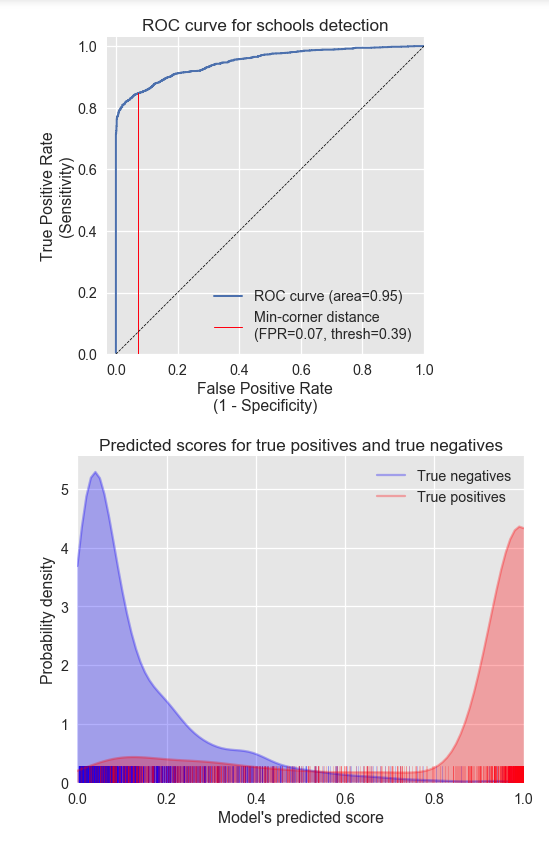

### Next

We are currently using our tensorflow serving image testing out the trained model's predicting power over a northwest part of Colombia before we have our Data Team, five expert mappers, to validate the model results. 